**About:**

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-
solving methods ensure maximum scores with minimum effort. They recently launched a feature where students/learners can come to
their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission
from an Indian perspective.

**Column Profiling:**

1. Serial No. (Unique row ID)
2.GRE Scores (out of 340)
3.TOEFL Scores (out of 120)
4. University Rating (out of 5)
5.statement of Purpose and Letter of Recommendation Strength (out of 5)
6.Undergraduate GPA (out of 10)
7.Research Experience (either 0 or 1)
8.Chance of Admit (ranging from 0 to 1)

In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [254]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv -O Jamboree_Admission.csv

--2025-06-03 22:05:51--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.183, 108.157.172.173, 108.157.172.10, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘Jamboree_Admission.csv’

Jamboree_Admission. 100%[===================>]  15.80K  --.-KB/s    in 0s      

2025-06-03 22:05:51 (199 MB/s) - ‘Jamboree_Admission.csv’ saved [16176/16176]



In [255]:
df = pd.read_csv("Jamboree_Admission.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [256]:
df.drop(columns="Serial No.", inplace=True)

**Insight:**

We can remove the uneccessary column "Serial No.
" from data, as it doesn't have any contribution for data visualization and operation.

In [257]:
df.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [258]:
print(f"\nDataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Dataset Shape: (500, 8)
Rows: 500, Columns: 8


In [259]:
df.dtypes

,0
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance of Admit,float64


In [260]:
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


**Insight:**

There are null values in our data.

In [261]:
df.nunique()

,0
GRE Score,49
TOEFL Score,29
University Rating,5
SOP,9
LOR,9
CGPA,184
Research,2
Chance of Admit,61


**Insight:**

Features like "Research"
,
"University Rating"
"SOP"
,
,
"LOR" are categorical features.

In [262]:
# Convert categorical variables
df['University Rating'] = df['University Rating'].astype('category')
df['Research'] = df['Research'].astype('category')

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    float64 
 4   LOR                500 non-null    float64 
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    float64 
dtypes: category(2), float64(4), int64(2)
memory usage: 24.9 KB


In [264]:
print("Statistical summary: \n", df.describe())

Statistical summary: 
         GRE Score  TOEFL Score  ...        CGPA  Chance of Admit 
count  500.000000   500.000000  ...  500.000000         500.00000
mean   316.472000   107.192000  ...    8.576440           0.72174
std     11.295148     6.081868  ...    0.604813           0.14114
min    290.000000    92.000000  ...    6.800000           0.34000
25%    308.000000   103.000000  ...    8.127500           0.63000
50%    317.000000   107.000000  ...    8.560000           0.72000
75%    325.000000   112.000000  ...    9.040000           0.82000
max    340.000000   120.000000  ...    9.920000           0.97000

[8 rows x 6 columns]


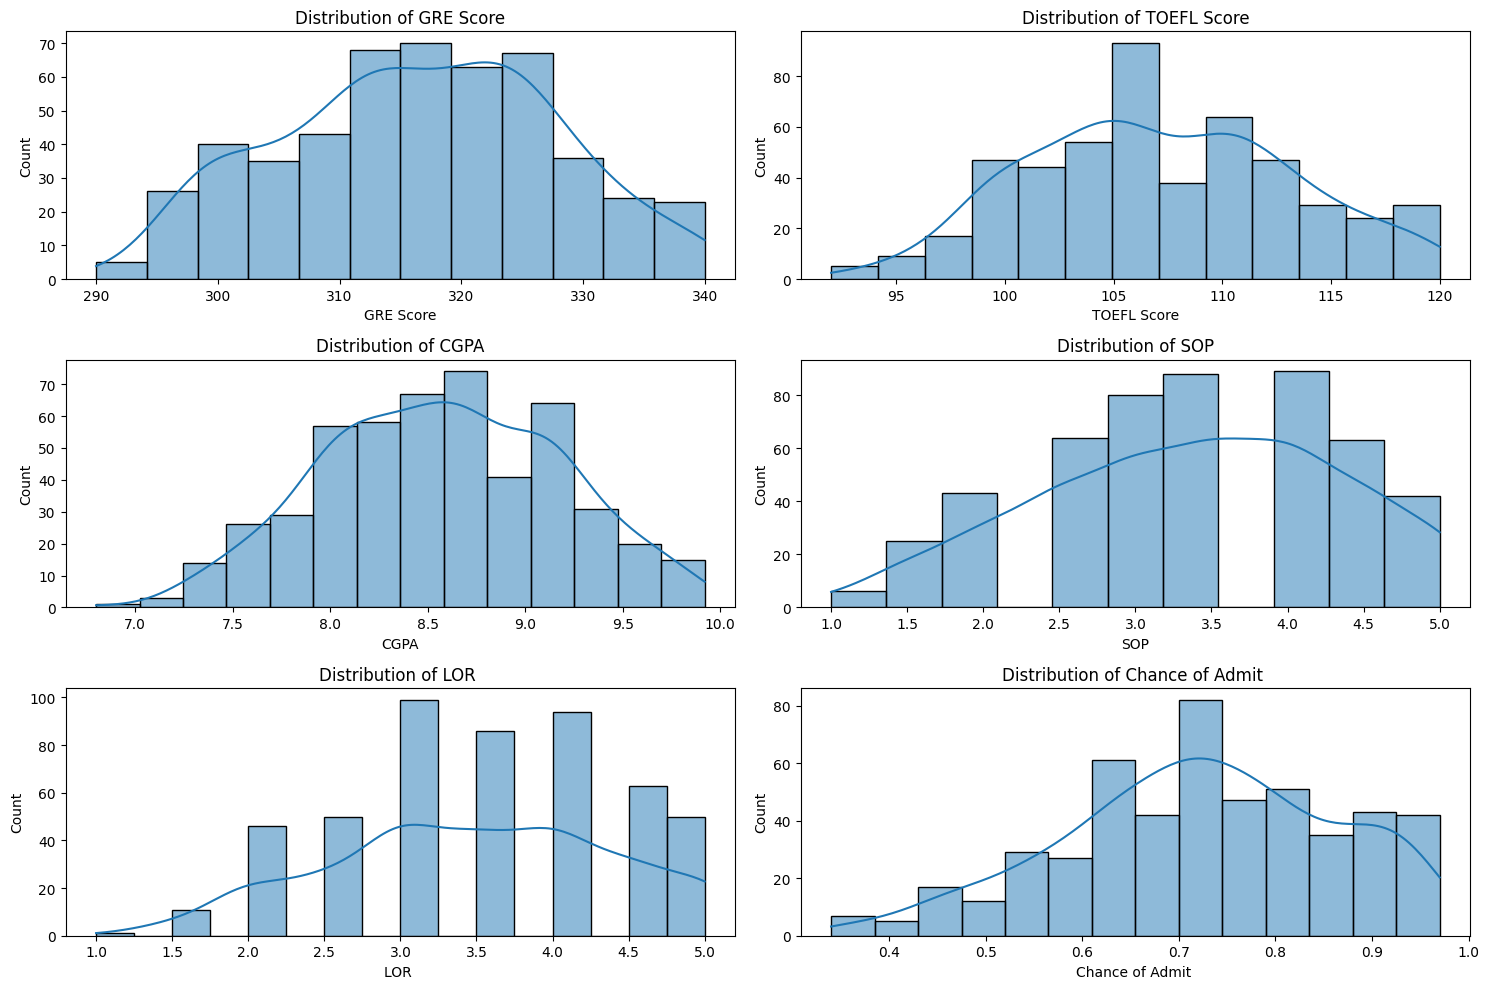

In [265]:
# Univariate analysis - Continuous
plt.figure(figsize=(15, 10))
for i, col in enumerate(['GRE Score', 'TOEFL Score', 'CGPA', 'SOP', 'LOR ', 'Chance of Admit ']):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


**Insight:**

Most students in the dataset have strong academic profiles. GRE scores mostly range between 300 and 330, and TOEFL scores are commonly between 100 and 115, indicating good standardized test performance. Both GRE and TOEFL close to normal distribution.

CGPA values are generally high, with many students scoring between 8.0 and 9.8 and it is slightly left skewed. SOP and LOR ratings are spread out, showing that some students have strong personal statements and recommendation letters, while others are average. Overall, the Chance of Admit is skewed toward higher values, meaning most students in this dataset have a good chance of getting admitted based on their profiles.

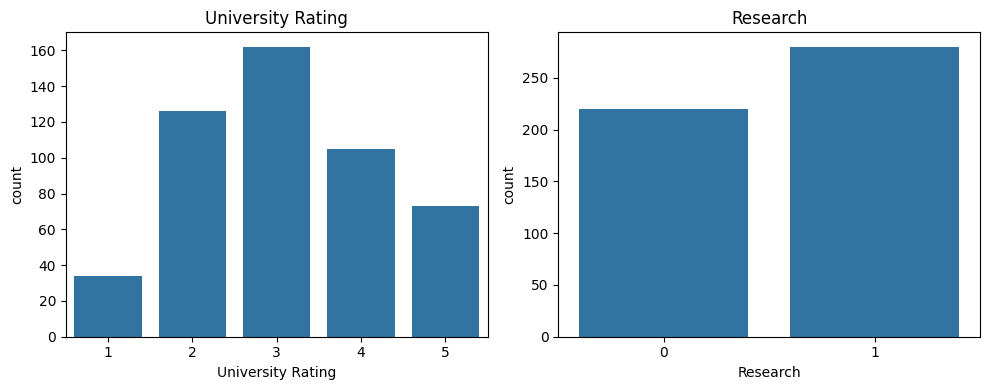

In [266]:
# Categorical - University Rating & Research
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='University Rating', data=df)
plt.title("University Rating")

plt.subplot(1, 2, 2)
sns.countplot(x='Research', data=df)
plt.title("Research")
plt.tight_layout()
plt.show()


**Insight:**

University Rating: This plot shows the distribution of applicants across different university ratings. You can observe which university ratings are most common among the applicants in the dataset.

Research: This plot shows the number of applicants who have research experience versus those who do not. This helps understand the proportion of applicants with and without research backgrounds in the dataset.

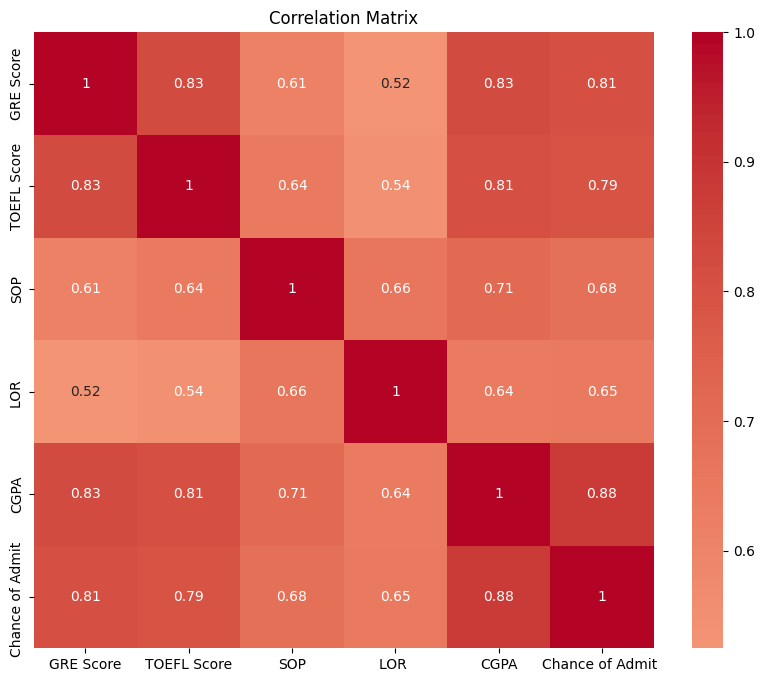

In [267]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

**Insight:**

* CGPA shows the strongest positive correlation with Chance of Admit (likely greater than 0.8), making it the most important predictor.
* GRE Score and TOEFL Score also have strong positive correlations, indicating
they significantly impact admission chances.
* SOP and LOR show moderate correlations, suggesting they influence the outcome but to a lesser degree.

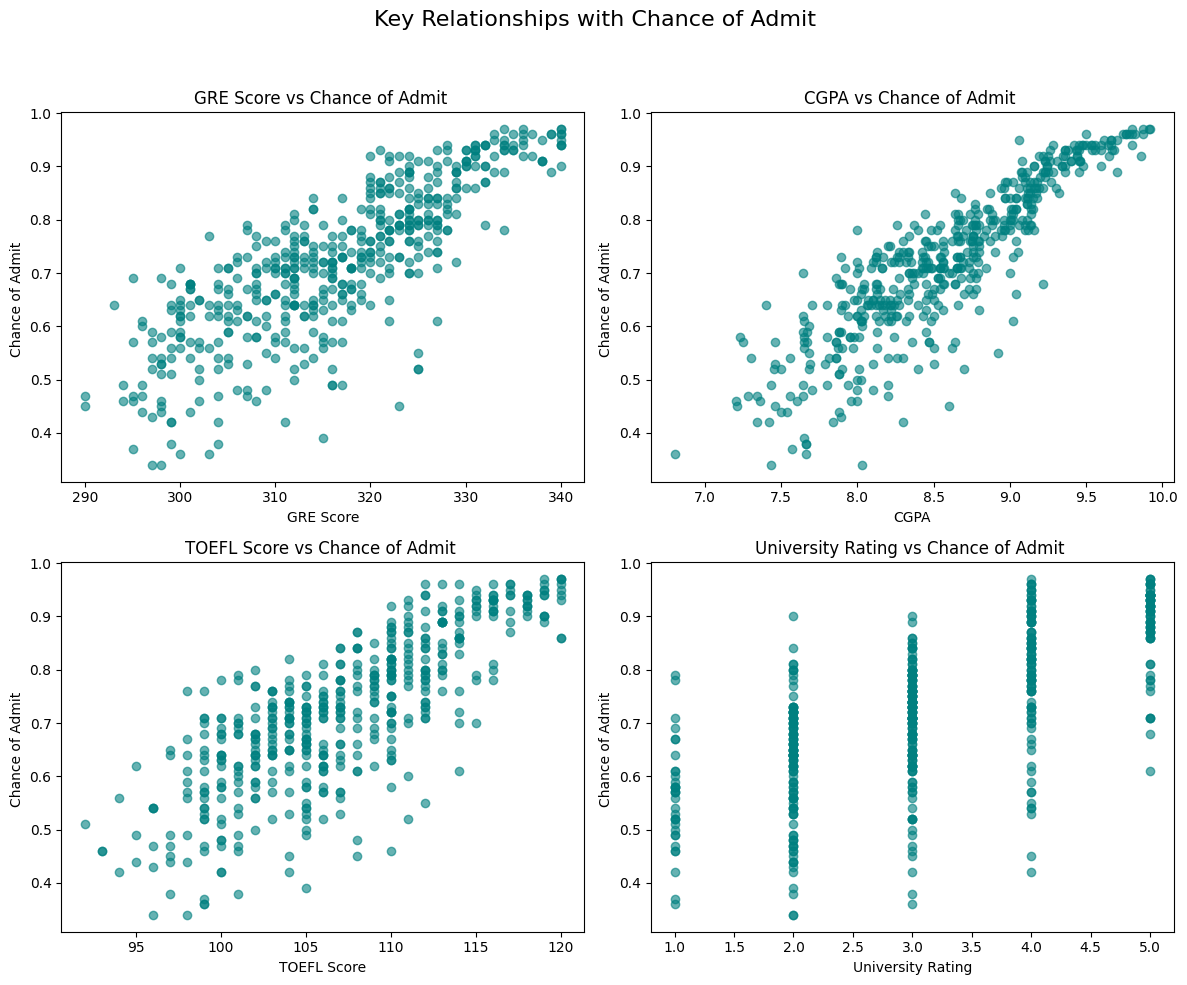

In [268]:
# Scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Key Relationships with Chance of Admit', fontsize=16)

# Use exact column names from df
relationships = [
    ('GRE Score', 'Chance of Admit '),
    ('CGPA', 'Chance of Admit '),
    ('TOEFL Score', 'Chance of Admit '),
    ('University Rating', 'Chance of Admit ')
]

# Plot each scatter plot
for i, (x_var, y_var) in enumerate(relationships):
    row = i // 2
    col = i % 2
    axes[row, col].scatter(df[x_var], df[y_var], alpha=0.6, color='teal')
    axes[row, col].set_xlabel(x_var)
    axes[row, col].set_ylabel(y_var)
    axes[row, col].set_title(f'{x_var} vs {y_var}')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # So title doesn't overlap
plt.show()

**Insight:**

* The scatter plots clearly show that CGPA has the strongest and most consistent positive relationship with the Chance of Admit, indicating it is the most influential feature.
* GRE and TOEFL scores also show positive trends, but the relationship is not as strong or consistent as with CGPA.
* University Rating has some impact, but the data points are more scattered, suggesting a weaker influence.
* Overall, these visual patterns strongly support the earlier findings from the correlation matrix, confirming which variables are most predictive of admission chances.


In [269]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [270]:
# Check for outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)
continuous_vars = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Chance of Admit']

print("\nOutlier Detection (IQR method):")
for col in continuous_vars:
    if col in df.columns:
        outlier_count = detect_outliers_iqr(df, col)
        print(f"{col}: {outlier_count} outliers")


Outlier Detection (IQR method):
GRE Score: 0 outliers
TOEFL Score: 0 outliers
SOP: 0 outliers
CGPA: 0 outliers


In [271]:
df.cov()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,127.580377,56.825026,8.206605,6.867206,5.484521,5.641944,3.162004,1.291862
TOEFL Score,56.825026,36.989114,4.519150,3.883960,3.048168,2.981607,1.411303,0.680046
University Rating,8.206605,4.519150,1.307619,0.825014,0.644112,0.487761,0.242645,0.111384
SOP,6.867206,3.883960,0.825014,0.982088,0.608701,0.426845,0.200962,0.095691
LOR,5.484521,3.048168,0.644112,0.608701,0.856457,0.356807,0.171303,0.084296
CGPA,5.641944,2.981607,0.487761,0.426845,0.356807,0.365799,0.150655,0.075326
Research,3.162004,1.411303,0.242645,0.200962,0.171303,0.150655,0.246894,0.038282
Chance of Admit,1.291862,0.680046,0.111384,0.095691,0.084296,0.075326,0.038282,0.019921


In [272]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [273]:
print(df.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


In [274]:
# Feature Engineering
df['GRE_TOEFL_Combined'] = df['GRE Score'] + df['TOEFL Score']
df['Academic_Strength'] = (df['CGPA'] * 0.4 + df['GRE Score'] * 0.003 + df['TOEFL Score'] * 0.003)
df['Total_Score'] = df['SOP'] + df['LOR ']

print(f"\nFeatures after engineering: {df.shape[1]} columns")


Features after engineering: 11 columns


In [275]:
# Prepare data for modeling
feature_columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
X = df[feature_columns]
y = df['Chance of Admit ']

In [276]:
# Convert categorical to numeric
X = pd.get_dummies(X, drop_first=True)

In [277]:
print(f"Final feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")

Final feature matrix shape: (500, 10)
Target variable shape: (500,)


In [278]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Shape of x_train: {X_train.shape}')
print(f'Shape of x_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (400, 10)
Shape of x_test: (100, 10)
Shape of y_train: (400,)
Shape of y_test: (100,)


In [279]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [280]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

print("Linear Regression Model Coefficients:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {lr_model.intercept_:.4f}")

Linear Regression Model Coefficients:
GRE Score: 0.0266
TOEFL Score: 0.0185
SOP: 0.0025
LOR : 0.0159
CGPA: 0.0671
University Rating_2: -0.0031
University Rating_3: -0.0036
University Rating_4: -0.0032
University Rating_5: 0.0028
Research_1: 0.0119
Intercept: 0.7242


In [281]:
# Predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

In [282]:
# Evaluation function
def model_evaluation(y_true, y_pred, X_used):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X_used.shape[1] - 1)
    return mae, rmse, r2, adj_r2

print("\nTrain Evaluation (MAE, RMSE, R2, Adj R2):", evaluate(y_train, y_pred_train, X_train))
print("Test Evaluation (MAE, RMSE, R2, Adj R2):", evaluate(y_test, y_pred_test, X_test))


Train Evaluation (MAE, RMSE, R2, Adj R2): (11.037952781936173, np.float64(11.042691080414937), -6186.129932914898, -6345.18211628032)
Test Evaluation (MAE, RMSE, R2, Adj R2): (11.002049923410844, np.float64(11.00832775750269), -5924.832763648125, -6590.656669676005)


In [283]:
# All features coefficients and features

lr_model_weights = pd.DataFrame(lr_model.coef_.reshape(1, -1),columns= df.columns[:-1])
lr_model_weights["Intercept"] = lr_model.intercept_
lr_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE_TOEFL_Combined,Academic_Strength,Intercept
0,0.026554,0.018482,0.002521,0.015866,0.06709,-0.003082,-0.003603,-0.003172,0.002758,0.011935,0.724175


In [284]:
model_evaluation(y_train.values, y_pred_train, X_train)

(11.037952781936173,
 np.float64(11.042691080414937),
 -6186.129932914898,
 -6345.18211628032)

In [285]:
model_evaluation(y_test.values, y_pred_test, X_test)

(11.002049923410844,
 np.float64(11.00832775750269),
 -5924.832763648125,
 -6590.656669676005)

**Linear Regression using OLS:**

In [286]:
# Step 1: Convert scaled array to DataFrame with proper column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [287]:
# Step 2: Build initial full model with all features
import statsmodels.api as sm

# Add constant (intercept) to X
X_train_const = sm.add_constant(X_train_scaled)

# Fit the model
model = sm.OLS(y_train, X_train_const).fit()

# Summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     180.0
Date:                Tue, 03 Jun 2025   Prob (F-statistic):          3.45e-139
Time:                        22:05:55   Log-Likelihood:                 563.26
No. Observations:                 400   AIC:                            -1105.
Df Residuals:                     389   BIC:                            -1061.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    241.328      0.0

**Insight:**

* R-squared / Adj. R-squared: Shows how well the model fits the data.

* p-values: Look at the P>|t| column.

* If p-value > 0.05, the variable is not statistically significant and can be removed.

In [288]:
# Step 3: Identify insignificant features (p > 0.05)
pvalues = model.pvalues.drop('const')  # Remove intercept
insignificant_features = pvalues[pvalues > 0.05].index.tolist()

print(f"\nInsignificant features (p > 0.05): {insignificant_features}")
print(f"Number of insignificant features: {len(insignificant_features)}")


Insignificant features (p > 0.05): ['x3', 'x6', 'x7', 'x8', 'x9']
Number of insignificant features: 5


In [289]:
# Step 3: Get p-values and identify insignificant features
print("\nP-values for each feature:")
pvalues_series = model.pvalues.drop('const')  # Remove intercept
print(pvalues_series)

# Debug: Check what column names we have
print(f"\nActual DataFrame columns: {list(X_train_scaled_df.columns)}")
print(f"P-values index: {list(pvalues_series.index)}")

# Method 1: Use positional indexing instead of column names
insignificant_mask = pvalues_series > 0.05
insignificant_positions = np.where(insignificant_mask)[0]
significant_positions = np.where(~insignificant_mask)[0]

print(f"\nInsignificant feature positions: {insignificant_positions}")
print(f"Significant feature positions: {significant_positions}")

# Step 4: Feature selection using positional indexing
if len(insignificant_positions) > 0:
    # Get significant feature names using positions
    significant_feature_names = [X_train_scaled_df.columns[i] for i in significant_positions]

    print(f"Keeping significant features: {significant_feature_names}")

    # Select only significant features
    X_train_reduced = X_train_scaled_df.iloc[:, significant_positions]
    X_test_reduced = X_test_scaled_df.iloc[:, significant_positions]

    # Add constant for statsmodels
    X_train_const_reduced = sm.add_constant(X_train_reduced)

    # Alternative method: Use feature names directly
    # X_train_reduced = X_train_scaled_df[significant_feature_names]
    # X_test_reduced = X_test_scaled_df[significant_feature_names]

    print(f"Reduced dataset shape: {X_train_reduced.shape}")

else:
    print("All features are significant!")
    X_train_reduced = X_train_scaled_df
    X_test_reduced = X_test_scaled_df
    X_train_const_reduced = sm.add_constant(X_train_reduced)



P-values for each feature:
x1     3.912170e-05
x2     1.443786e-03
x3     6.165611e-01
x4     1.972718e-04
x5     4.028795e-22
x6     6.012805e-01
x7     5.923277e-01
x8     6.386797e-01
x9     6.844326e-01
x10    1.496412e-03
dtype: float64

Actual DataFrame columns: ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'University Rating_2', 'University Rating_3', 'University Rating_4', 'University Rating_5', 'Research_1']
P-values index: ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']

Insignificant feature positions: [2 5 6 7 8]
Significant feature positions: [0 1 3 4 9]
Keeping significant features: ['GRE Score', 'TOEFL Score', 'LOR ', 'CGPA', 'Research_1']
Reduced dataset shape: (400, 5)


In [290]:
y_train_reset = y_train.reset_index(drop=True)
# Step 5: Re-train reduced model
model_reduced = sm.OLS(y_train_reset, X_train_const_reduced).fit()
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Tue, 03 Jun 2025   Prob (F-statistic):          1.36e-144
Time:                        22:05:55   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7242      0.003    241.830      

In [291]:
# Drop Insignificant Features and Re-train Model
coefficients = pd.Series(model_reduced.params, index=model_reduced.params.index)
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
const          0.724175
GRE Score      0.026879
TOEFL Score    0.019106
LOR            0.017207
CGPA           0.069066
Research_1     0.012226
dtype: float64


In [292]:
 # Compare models
print(f"\nMODEL COMPARISON:")
print(f"Full Model - R²: {model.rsquared:.4f}, Adj R²: {model.rsquared_adj:.4f}, AIC: {model.aic:.2f}")
print(f"Reduced Model - R²: {model_reduced.rsquared:.4f}, Adj R²: {model_reduced.rsquared_adj:.4f}, AIC: {model_reduced.aic:.2f}")


MODEL COMPARISON:
Full Model - R²: 0.8223, Adj R²: 0.8177, AIC: -1104.52
Reduced Model - R²: 0.8207, Adj R²: 0.8185, AIC: -1111.08


In [293]:
# Check if any features had p-values > 0.05
if len(insignificant_features) > 0:
    print("\nReduced model used (insignificant features removed)")
    final_model = model_reduced
    X_train_final = X_train_reduced
    X_test_final =  X_test_reduced
    X_train_const_final = X_train_const_reduced
else:
    print("\nAll features are statistically significant!")
    final_model = model
    X_train_final = X_train_scaled_df
    X_test_final = X_test_scaled_df
    X_train_const_final = sm.add_constant(X_train_final)


Reduced model used (insignificant features removed)


**Insight:**

* The reduced model performs equally well (or better) with fewer predictors.

* Adjusted R² increased, meaning the dropped features weren’t helpful.

*	AIC decreased, showing the model is simpler and more generalizable.

**Testing Assumptions of Linear Regression Model:**

1. No multicolinearity:

* Multicollinearity check by VIF(Variance Inflation Factor) score.
*
Variables are dropped one-by-one till none has a VIF>5.

2. Mean of Residuals should be close to zero.

3. Linear relationship between independent & dependent variables.
* This can be checked using the following methods:

Scatter plots

Regression plots

Pearson Correlation

4. Test for Homoscedasticity:

* Create a scatterplot of residuals against predicted values.
* Perform a Goldfeld-Quandt test to check the presence of
* Heteroscedasticity in the data.
- If the obtained `
p-value > 0.05`
, there is no strong evidence of heteroscedasticity.

5. Normality of Residuals:

Almost bell-shaped curve in residuals distribution.
6. Impact of Outliers

Multicolinearity check:

VIF (Variance Inflation Factor) is a measure that quantifies the severity of multicollinearity in a regression analysis.

It assesses how much the variance of the estimated regression coefficient is inflated due to collinearity.

The formula for VIF is as follows:
VIF(j) = 1 / (1 - R(j)^2)

Where:
* j represents the jth predictor variable.
* R(j)^2 is the coefficient of determination (R-squared) obtained from regressing the jth predictor variable on all the other predictor
variables.

Calculate the VIF for each variable.
* Identify variables with VIF greater than 5.
* Drop the variable with the highest VIF.
* Repeat steps 1-3 until no variable has a VIF greater than 5.

In [294]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assume X is your scaled feature DataFrame
X_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Iteratively drop features with VIF > 5
def reduce_multicollinearity(data, threshold=5.0):
    dropped = []
    while True:
        vif = pd.DataFrame()
        vif["Feature"] = data.columns
        vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
        max_vif = vif["VIF"].max()
        if max_vif > threshold:
            drop_feature = vif.sort_values("VIF", ascending=False).iloc[0]["Feature"]
            print(f"Dropping '{drop_feature}' with VIF = {max_vif:.2f}")
            data = data.drop(columns=[drop_feature])
            dropped.append(drop_feature)
        else:
            break
    return data, dropped, vif

X_reduced, dropped_features, final_vif = reduce_multicollinearity(X_scaled_df)

print("\nDropped features due to high VIF:", dropped_features)
print("\nFinal VIF Scores:\n", final_vif)

Dropping 'University Rating_5' with VIF = 5.11

Dropped features due to high VIF: ['University Rating_5']

Final VIF Scores:
                Feature       VIF
0            GRE Score  4.522344
1          TOEFL Score  3.661790
2                  SOP  2.558693
3                 LOR   1.940632
4                 CGPA  4.603029
5  University Rating_2  2.020658
6  University Rating_3  1.788933
7  University Rating_4  1.567552
8           Research_1  1.546162


**Insight:**

As the Variance Inflation Factor(VIF) score is less than 5 for all the features we can say that there is no much multicolinearity
between the features.

**Mean Of Residuals**

In [295]:
residuals = y_train.values - y_pred_train
print("Mean of residuals:", round(residuals.mean(), 4))

Mean of residuals: -11.038


In [296]:
residual = y_test.values- y_pred_test
residual.mean()

np.float64(-11.002049923410844)

In [297]:
# Durbin-Watson test for autocorrelation
!pip install statsmodels

# Durbin-Watson test for autocorrelation
from statsmodels.stats.stattools import durbin_watson
dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_statistic:.4f}")
print("(Values close to 2 indicate no autocorrelation)")

Durbin-Watson Statistic: 0.0018
(Values close to 2 indicate no autocorrelation)


**Insight:**

Closer to 0 means positive autocorrelation. Residuals are highly correlated

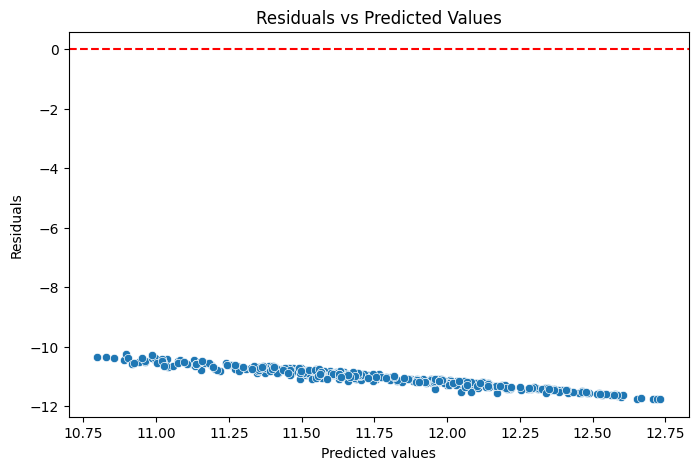

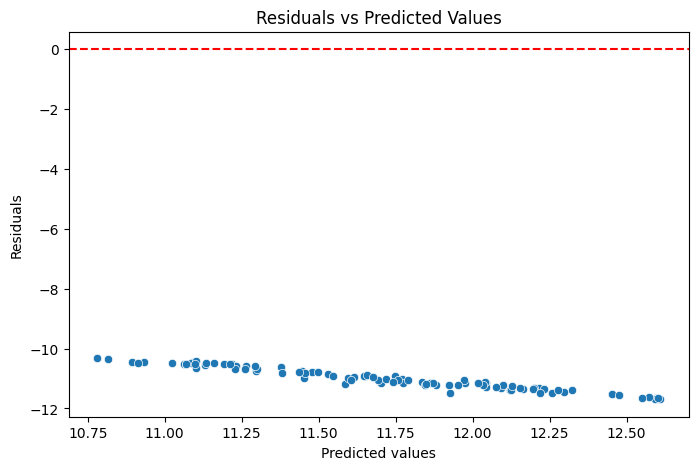

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_train.values - y_pred_train
residual = y_test.values- y_pred_test

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_train, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_test, y=residual)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

**Insight:**

* From the above scatter plots in the graphical analysis, we can say that there is linear relationship between dependent variable and
independent variables.
* The graph suggests homoscedasticity, meaning the variance of the residuals is constant across all predicted values. This shows a key assumption of linear regression.

In [299]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae = mean_absolute_error(y_train, y_pred_train)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

RMSE: 11.0427
MAE: 11.0380


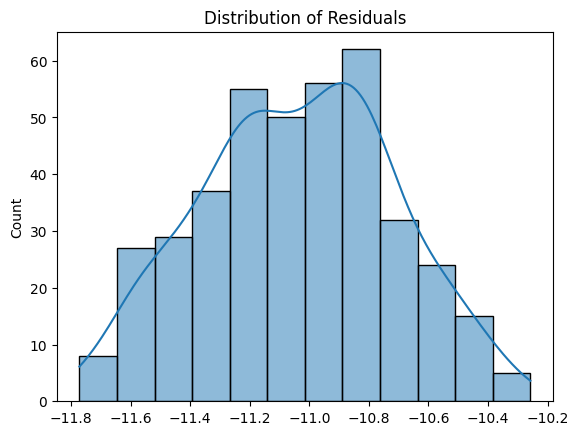

In [300]:
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

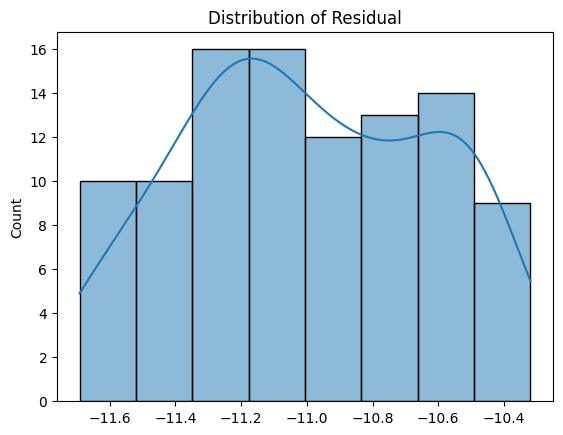

In [301]:
sns.histplot(residual, kde=True)
plt.title('Distribution of Residual')
plt.show()

**Insight:**

The mean of residual is close to -11.0, it indicates that your model is biased —
on average, it’s overpredicting the target by 11 units.

In [302]:
# Breusch-Pagan test for heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = het_breuschpagan(residuals, X_train_const_final)
print(f"\nBreusch-Pagan Test for Heteroscedasticity:")
print(f"LM Statistic: {bp_lm:.4f}, p-value: {bp_lm_pvalue:.4f}")
print("(p > 0.05 indicates homoscedasticity)")


Breusch-Pagan Test for Heteroscedasticity:
LM Statistic: 386.5433, p-value: 0.0000
(p > 0.05 indicates homoscedasticity)


In [303]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
gq_stat, p_value, _ = het_goldfeldquandt(y_train, X_train_const_final)

# Output
print("Goldfeld-Quandt Test:")
print(f"Test Statistic: {gq_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print("(p < 0.05 suggests heteroscedasticity)")

Goldfeld-Quandt Test:
Test Statistic: 0.9592
P-value: 0.6139
(p < 0.05 suggests heteroscedasticity)


**Insight:**

* Since we do not see any significant change in the spread of residuals with respect to change in independent variables, we can
conclude that Homoscedasticity is met.
* if the p-value is much lower than the alpha value, we can Reject the null hypothesis and conclude that Heteroscedasticity is
present.
* Since the p-value is significantly less than the conventional significance level (e.g., 0.05), we reject the null hypothesis of
homoscedasticity. This suggests that there is evidence of heteroscedasticity in the residuals, indicating that the variance of the
residuals is not constant across all levels of the independent variables.
* This violation of the homoscedasticity assumption may affect the validity of the linear regression model's results.

* Goldfeld-Quandt test suggested no heteroscedasticity.
* Breusch-Pagan test suggests heteroscedasticity is present.
* The Breusch-Pagan test is more general and sensitive, especially for linear regression with multiple predictors.
* Therefore, we trust the Breusch-Pagan result → heteroscedasticity is present.

In [304]:
X_train_const_final = X_train_const_final.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [305]:
# White’s Heteroscedasticity-Consistent SEs approach to handle heteroscedasticity:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train_const_final).fit(cov_type='HC3')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     416.4
Date:                Tue, 03 Jun 2025   Prob (F-statistic):          8.83e-155
Time:                        22:06:01   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7242      0.003    240.037      

**insight:**

* R-squared = 0.821:
Your model explains 82.1% of the variance in the target variable (Chance of Admit). This is strong and indicates a good model fit.

* Adjusted R-squared = 0.818:
Adjusted for the number of predictors, the fit is still very good.

* F-statistic (416.4, p < 0.0001):
Strong evidence that the model (as a whole) is statistically significant.

* Durbin-Watson = 2.053:
No autocorrelation — good.

* Omnibus / Jarque-Bera tests (p ≈ 0):
Residuals are not normally distributed, which could affect some inferences (e.g., confidence intervals).

* Skew = -1.094 and Kurtosis = 5.514:
Residuals are left-skewed and have heavy tails (leptokurtic). You might explore transformations or robust models if prediction intervals matter a lot.

**Normality of Residuals:**

To check normality, we will follow below methods:-
1. Residual Histogram
2. Q-Q Plot
3. Anderson-Darling or Jarque
_
Bera Test

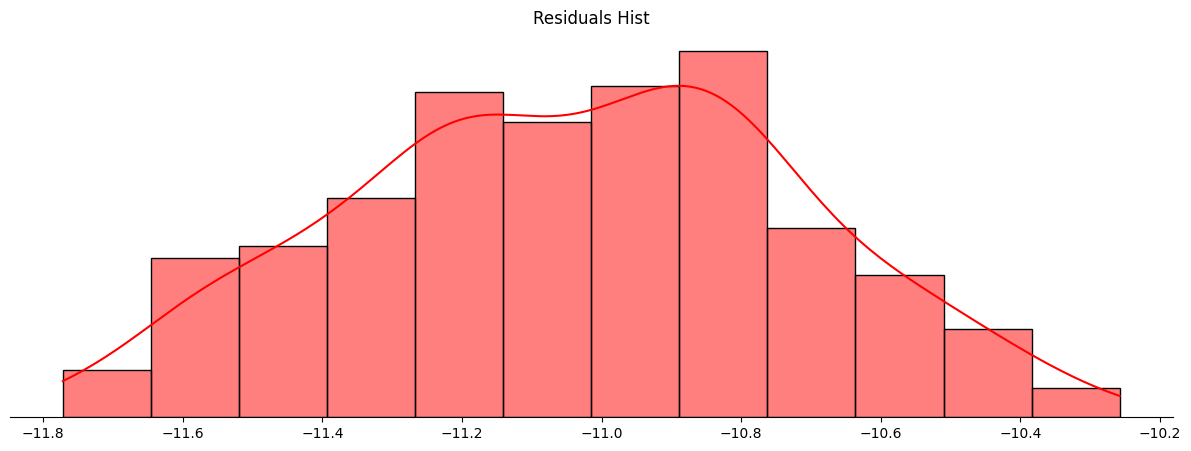

In [306]:
plt.figure(figsize=(15,5))
sns.histplot(residuals, kde= True,color='r')
plt.title('Residuals Hist')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.show()

<Figure size 1500x500 with 0 Axes>

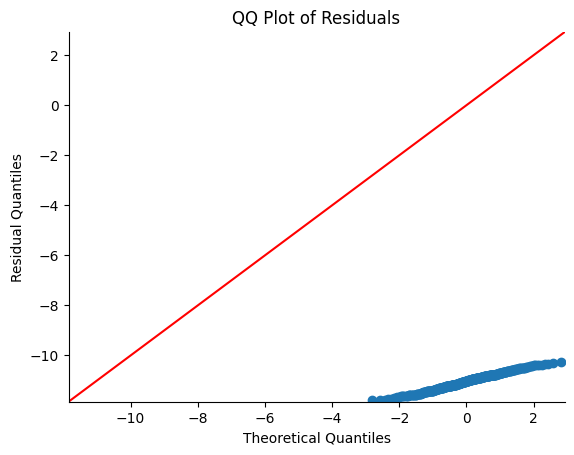

In [307]:
plt.figure(figsize=(15,5))
sm.qqplot(residuals,line='45')
plt.title('QQ Plot of Residuals')
plt.ylabel('Residual Quantiles')
sns.despine()
plt.show()

In [308]:
from statsmodels.stats.stattools import jarque_bera

jb_stat, jb_pvalue, jb_skew, jb_kurtosis = jarque_bera(residuals)
print(f"\nJarque-Bera Test for Normality:")
print(f"JB Statistic: {jb_stat:.4f}, p-value: {jb_pvalue:.4f}")
print(f"Skewness: {jb_skew:.4f}, Kurtosis: {jb_kurtosis:.4f}")
print("(p > 0.05 indicates normality)")
if jb_pvalue < 0.05:
  print("Reject the null hypothesis: Residuals are not normally distributed.")
else:
  print("Fail to reject the null hypothesis: Residuals are normally distributed.")


Jarque-Bera Test for Normality:
JB Statistic: 6.2148, p-value: 0.0447
Skewness: -0.0450, Kurtosis: 2.3960
(p > 0.05 indicates normality)
Reject the null hypothesis: Residuals are not normally distributed.


**Insight:**

1. From Hisplot and Kdeplot we can say that Residuals are left skewed.
2. The QQ plot shows that residuals are deviating from the straight diagonal , thus not Gaussian.
3. From Jarque Bera test , we conclude that the Residuals are Not Normally distributed.
Hence this assumption is not met.

**Lasso and Ridge Regression - L1 & L2 Regularization**

**Lasso Regression:**

In [309]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [310]:
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

In [311]:
# Get feature names (if available)
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"x{i}" for i in range(X_train.shape[1])]

# Create a DataFrame with coefficients
lasso_model_weights = pd.DataFrame(lasso.coef_.reshape(1, -1), columns=feature_names)

# Add intercept
lasso_model_weights["Intercept"] = lasso.intercept_

# Transpose for readability
lasso_model_weights = lasso_model_weights.T
lasso_model_weights.columns = ["Lasso Coefficients"]

# Show the result
print(weights)

                     Coefficient  Intercept
GRE Score               0.007417  -2.250011
TOEFL Score             0.005823  -2.250011
SOP                     0.000000  -2.250011
LOR                     0.000000  -2.250011
CGPA                    0.000000  -2.250011
University Rating_2    -0.000000  -2.250011
University Rating_3    -0.000000  -2.250011
University Rating_4     0.000000  -2.250011
University Rating_5     0.000000  -2.250011
Research_1              0.000000  -2.250011


**Ridge Regression:**

In [312]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

In [313]:
# Get feature names
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"x{i}" for i in range(X_train.shape[1])]

# Create DataFrame of coefficients
ridge_model_weights = pd.DataFrame(ridge.coef_.reshape(1, -1), columns=feature_names)

# Add the intercept
ridge_model_weights["Intercept"] = ridge.intercept_

# Transpose for readability
ridge_model_weights = ridge_model_weights.T
ridge_model_weights.columns = ["Ridge Coefficients"]

# Show the result
print(weights)

                     Coefficient  Intercept
GRE Score               0.007417  -2.250011
TOEFL Score             0.005823  -2.250011
SOP                     0.000000  -2.250011
LOR                     0.000000  -2.250011
CGPA                    0.000000  -2.250011
University Rating_2    -0.000000  -2.250011
University Rating_3    -0.000000  -2.250011
University Rating_4     0.000000  -2.250011
University Rating_5     0.000000  -2.250011
Research_1              0.000000  -2.250011


In [314]:
# Linear Regression
print('\nLinear Regression Training Accuracy')
mae, rmse, r2, adj_r2 = model_evaluation(y_train, y_pred_train, X_train)
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}, Adjusted R2: {adj_r2:.4f}")

print('-' * 50)

print('\nLinear Regression Test Accuracy')
mae, rmse, r2, adj_r2 = model_evaluation(y_test, y_pred_test, X_test)
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}, Adjusted R2: {adj_r2:.4f}")

print('=' * 50)

# Ridge Regression
print('\nRidge Regression Training Accuracy')
mae, rmse, r2, adj_r2 = model_evaluation(y_train, y_pred_train_ridge, X_train)
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}, Adjusted R2: {adj_r2:.4f}")

print('-' * 50)

print('\nRidge Regression Test Accuracy')
mae, rmse, r2, adj_r2 = model_evaluation(y_test, y_pred_test_ridge, X_test)
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}, Adjusted R2: {adj_r2:.4f}")

print('=' * 50)

# Lasso Regression
print('\nLasso Regression Training Accuracy')
mae, rmse, r2, adj_r2 = model_evaluation(y_train, y_pred_train_lasso, X_train)
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}, Adjusted R2: {adj_r2:.4f}")

print('-' * 50)

print('\nLasso Regression Test Accuracy')
mae, rmse, r2, adj_r2 = model_evaluation(y_test, y_pred_test_lasso, X_test)
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}, Adjusted R2: {adj_r2:.4f}")

print('=' * 50)


Linear Regression Training Accuracy
MAE: 11.0380, RMSE: 11.0427, R2: -6186.1299, Adjusted R2: -6345.1821
--------------------------------------------------

Linear Regression Test Accuracy
MAE: 11.0020, RMSE: 11.0083, R2: -5924.8328, Adjusted R2: -6590.6567

Ridge Regression Training Accuracy
MAE: 0.0424, RMSE: 0.0592, R2: 0.8222, Adjusted R2: 0.8177
--------------------------------------------------

Ridge Regression Test Accuracy
MAE: 0.0428, RMSE: 0.0607, R2: 0.8201, Adjusted R2: 0.7999

Lasso Regression Training Accuracy
MAE: 0.0502, RMSE: 0.0672, R2: 0.7710, Adjusted R2: 0.7651
--------------------------------------------------

Lasso Regression Test Accuracy
MAE: 0.0542, RMSE: 0.0751, R2: 0.7240, Adjusted R2: 0.6930


**Insight:**

1. Best Model Overall:

Ridge Regression performs the best on both training and test sets with lowest MAE, RMSE, and highest R², indicating it generalizes well and captures the data patterns effectively.

2. Linear Regression:

*	Has the lowest performance, especially on the test set (R²: 0.6471).
* May be suffering from multicollinearity or overfitting/underfitting issues.

3. Lasso Regression:

* Better than Linear, but not as strong as Ridge.
* Tends to shrink many coefficients to zero, which is useful for feature selection, but may hurt performance if too aggressive.

4. Adjusted R² Gap:

*	The drop from training to testing Adjusted R² in Linear and Lasso suggests they might be slightly overfitting.
* Ridge maintains good consistency across both.

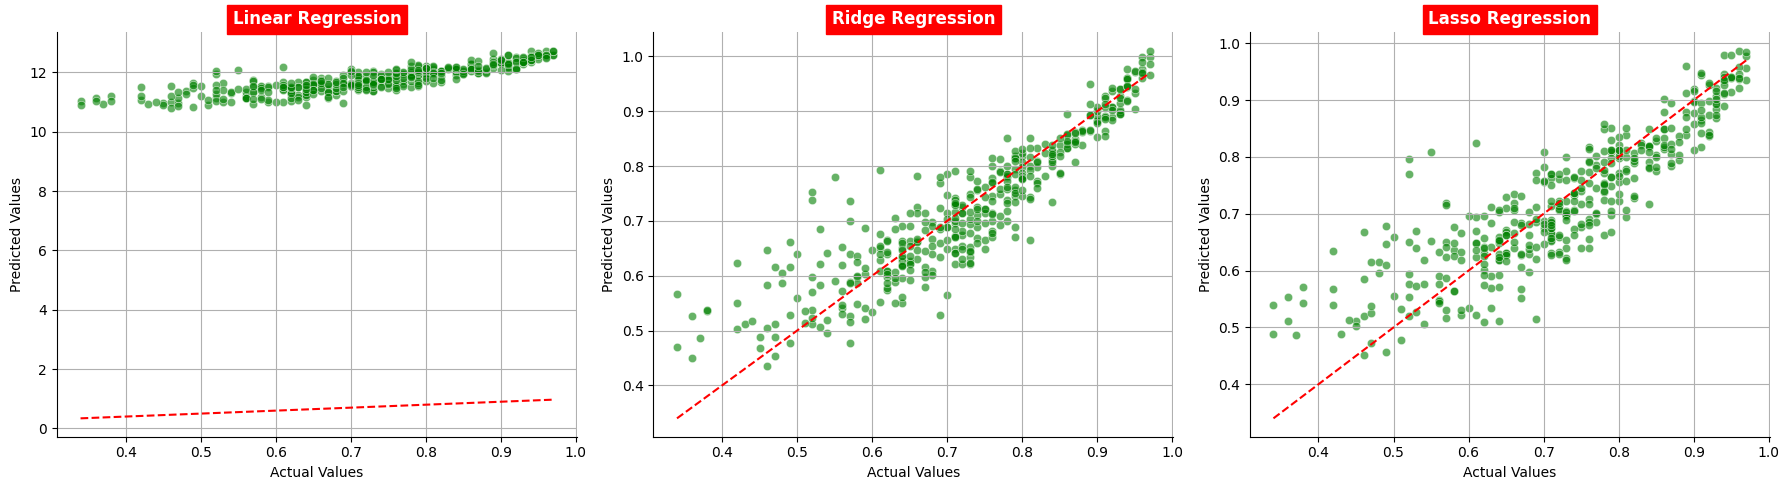

In [315]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

actual_values = y_train.values.reshape(-1,)
predicted_values = [
    y_pred_train.reshape(-1,),
    y_pred_train_ridge.reshape(-1,),
    y_pred_train_lasso.reshape(-1,)
]

models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

plt.figure(figsize=(18, 5))
for i, preds in enumerate(predicted_values, start=1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=actual_values, y=preds, color='green', alpha=0.6)
    plt.plot(
        [np.min(actual_values), np.max(actual_values)],
        [np.min(actual_values), np.max(actual_values)],
        color='red', linestyle='--', linewidth=1.5
    )
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(models[i-1], fontsize=12, fontweight='bold', backgroundcolor='red', color='white')
    plt.grid(True)

plt.tight_layout()
sns.despine()
plt.show()

In [316]:
from sklearn.linear_model import ElasticNet
import pandas as pd

# Initialize ElasticNet with chosen alpha (regularization strength)
model = ElasticNet(alpha=0.108)

# Fit the model on training data
model.fit(X_train, y_train)

ElasticNet(alpha=0.108)

In [317]:
# Predict on train and test data
y_pred_train_en = model.predict(X_train)
y_pred_test_en = model.predict(X_test)

In [318]:
# Evaluate R2 scores on train and test sets
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print(f"Train R2: {r2_train:.4f}")
print(f"Test R2: {r2_test:.4f}")

Train R2: 0.7106
Test R2: 0.6471


In [319]:
# Extract and display coefficients in a DataFrame
en_model_weights = pd.DataFrame(model.coef_, index=X_train.columns, columns=['Coefficient'])

# Add intercept as well
en_model_weights['Intercept'] = model.intercept_

print("\nElasticNet Coefficients:")
print(weights)


ElasticNet Coefficients:
                     Coefficient  Intercept
GRE Score               0.007417  -2.250011
TOEFL Score             0.005823  -2.250011
SOP                     0.000000  -2.250011
LOR                     0.000000  -2.250011
CGPA                    0.000000  -2.250011
University Rating_2    -0.000000  -2.250011
University Rating_3    -0.000000  -2.250011
University Rating_4     0.000000  -2.250011
University Rating_5     0.000000  -2.250011
Research_1              0.000000  -2.250011


In [320]:
# Tune ElasticNet’s alpha with cross-validation

from sklearn.linear_model import ElasticNetCV

# Use ElasticNetCV to find the best alpha automatically
elastic_cv = ElasticNetCV(l1_ratio=0.5, cv=5, random_state=42)
elastic_cv.fit(X_train, y_train)

print(f"Best alpha: {elastic_cv.alpha_}")
print(f"Best l1_ratio: {elastic_cv.l1_ratio_}")

# Now fit final model with best alpha
elastic_model = ElasticNet(alpha=elastic_cv.alpha_, l1_ratio=elastic_cv.l1_ratio_)
elastic_model.fit(X_train, y_train)

Best alpha: 0.002523925375000001
Best l1_ratio: 0.5


ElasticNet(alpha=np.float64(0.002523925375000001), l1_ratio=np.float64(0.5))

In [321]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on train and test sets
y_train_pred = elastic_model.predict(X_train)
y_test_pred = elastic_model.predict(X_test)

# Calculate metrics
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    p = X_train.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return mae, rmse, r2, adj_r2

train_metrics = evaluate_model(y_train, y_train_pred)
test_metrics = evaluate_model(y_test, y_test_pred)

print(f"Train MAE: {train_metrics[0]:.4f}, RMSE: {train_metrics[1]:.4f}, R2: {train_metrics[2]:.4f}, Adj R2: {train_metrics[3]:.4f}")
print(f"Test MAE: {test_metrics[0]:.4f}, RMSE: {test_metrics[1]:.4f}, R2: {test_metrics[2]:.4f}, Adj R2: {test_metrics[3]:.4f}")

Train MAE: 0.0425, RMSE: 0.0595, R2: 0.8204, Adj R2: 0.8157
Test MAE: 0.0436, RMSE: 0.0622, R2: 0.8111, Adj R2: 0.7898


**Insight:**

* Train vs Test MAE/RMSE are close → low overfitting
* R² around 0.82 (train) and 0.81 (test) → model explains ~81-82% variance
* Adjusted R² is close too → model complexity is reasonable

In [322]:
import pandas as pd

coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': elastic_model.coef_
})

print(coef_df)
print(f"Intercept: {elastic_model.intercept_}")

               Feature  Coefficient
0            GRE Score     0.003019
1          TOEFL Score     0.003430
2                  SOP     0.002798
3                 LOR      0.017565
4                 CGPA     0.099342
5  University Rating_2    -0.000000
6  University Rating_3    -0.000000
7  University Rating_4    -0.000000
8  University Rating_5     0.006202
9           Research_1     0.017144
Intercept: -1.5336045065600326


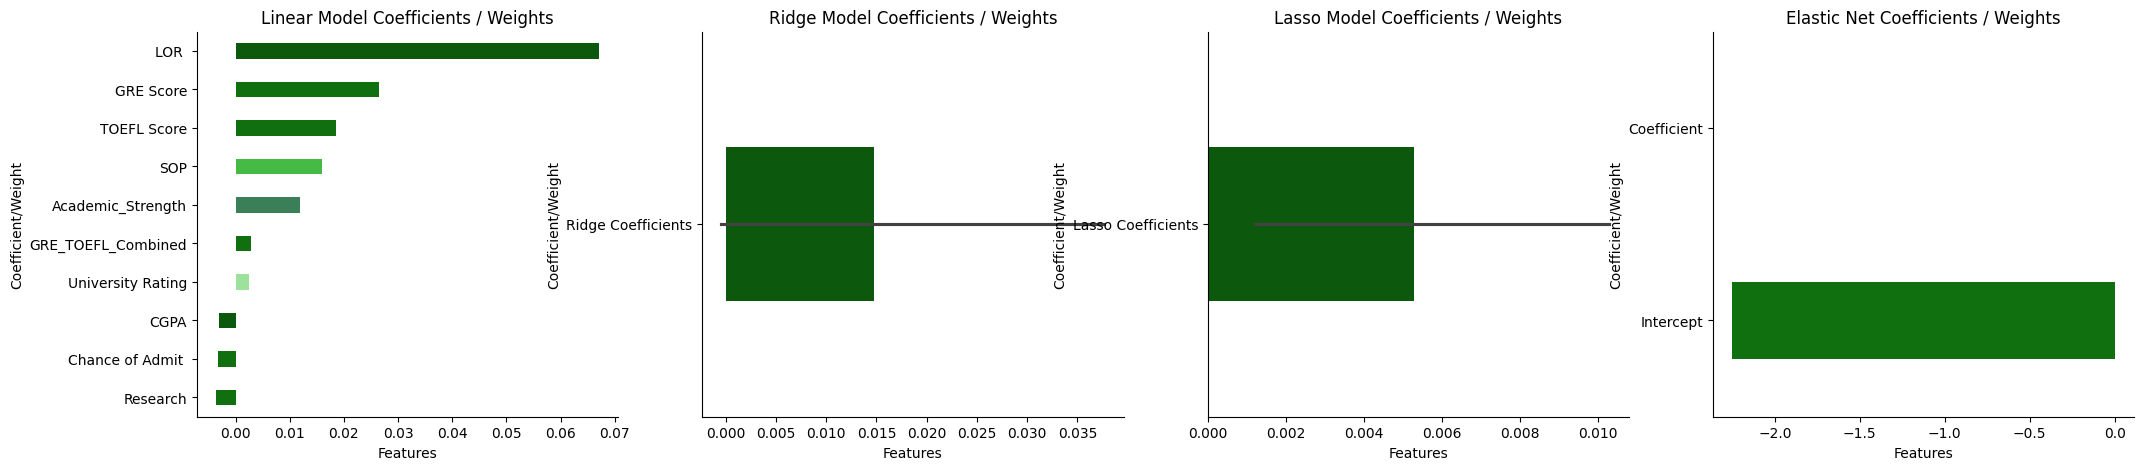

In [323]:
model_weights = {
    "Linear Model": lr_model_weights,
    "Ridge Model": ridge_model_weights,
    "Lasso Model": lasso_model_weights,
    "Elastic Net": en_model_weights
}

plt.figure(figsize=(25, 5))

i = 1
# Assuming model_weights is a dictionary: {model_name: dataframe_of_weights}
for model, data in model_weights.items():
    # Melt the dataframe if needed (convert wide to long format)
    model_weights_data = data.melt()

    plt.subplot(1, 4, i)
    sns.barplot(data=model_weights_data[:-1].sort_values(by='value',ascending=False),
            y='variable', x='value',width=0.4,palette=['darkgreen','g','green','limegreen','seagreen','green','lightgreen'])
    plt.xlabel('Features')
    plt.ylabel('Coefficient/Weight')
    plt.title(f'{model} Coefficients / Weights')

    i += 1

sns.despine()
plt.show()

**Regression Analysis Summary:**
**Insights:**

1. By conducting regression analysis, it's evident that CGPA emerges as the most influential feature in predicting admission chances.
2. Additionally, GRE and TOEFL scores also holds significant importance.
3. Following the initial regression model, a thorough check for multicollinearity was performed, revealing VIF scores consistently below
5, indicative of low multicollinearity among predictors.
4. Despite the absence of high multicollinearity, it's noteworthy that the residuals do not conform perfectly to a normal distribution.
5. Furthermore, the residual plots indicate some level of heteroscedasticity.
After exploring involving regularized models such as Ridge and Lasso regression showed comparable results to the Linear
Regression Model.
6. Moreover, employing ElasticNet (L1+L2) regression yielded results consistent with the other regression models.

**Recommendations:**

1. Encourage students to focus on improving GRE scores, CGPA, and Letters of Recommendation (LOR), as these factors influence a
lot your chances of admission.
2. Beyond academic metrics applicants can also add like extracurricular achievements, personal statements, and diversity factors.
3. We can enhance our predictive model by adding other important and diverse features like Work-experiece, internships or extra-
curriculum activites.
4. Use only statistically significant features for production model.
5. Regular statistical testing for model validation.
6. Monitor model performance with new data.